# Boat types recognition

## Abstract

The aim of this assignment is to recognize different boat types.
https://www.kaggle.com/clorichel/boat-types-recognition

Method used is CNN.

## Approach

### Part A - Deep Learning Model
Applied CNN using TensorFlow with Keras

### Part B - Activation Function 
* ReLU - Rectified Linear Unit
* TanH

### Part C - Cost Function
* Categorical Crossentropy
* Hinge

### Part D - Epochs
Max no of Epochs = 20

### Part E - Gradient Estimation
* RMSProp
* Stochastic Gradient Descent

### Part F - Network Architecture
* Single Layer 
* Added Additional Layers

### Part G - Network Initialization 
* Zeroes
* Ones


## Dataset

* Boat Types Recognition Dataset https://www.kaggle.com/clorichel/boat-types-recognition.
* This Dataset Contains about 1,500 pictures of boats, of various sizes, but classified by those different types: buoy, cruise ship, ferry boat, freight boat, gondola, inflatable boat, kayak, paper boat, sailboat.

### Importing Libraries

In [113]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [138]:
PATH = 'C:\\Users\\ritvi\\Train'
# Define data path
data_path = PATH 
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20

In [115]:
# Define the number of classes
num_classes = 9

labels_name={'buoy':0,'cruise ship':1,'ferry boat':2,'freight boat':3, 'gondola':4,
             'inflatable boat':5, 'kayak':6, 'paper boat':7, 'sailboat':8}

img_data_list=[]
labels_list = []

#### Preprocessing Data

In [116]:
# Reading the images 
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) # Converting to Greyscale
        input_img_resize=cv2.resize(input_img,(128,128)) # Changing the Size of Imgage 
        img_data_list.append(input_img_resize)
        labels_list.append(label)

Loading the images of dataset-buoy

Loading the images of dataset-cruise ship

Loading the images of dataset-ferry boat

Loading the images of dataset-freight boat

Loading the images of dataset-gondola

Loading the images of dataset-inflatable boat

Loading the images of dataset-kayak

Loading the images of dataset-paper boat

Loading the images of dataset-sailboat



In [127]:
# Converting Image into numerical values
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
img_data= np.expand_dims(img_data, axis=4) 
print (img_data.shape)

(1462, 128, 128, 1)


D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [129]:
labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([ 68, 239,  81,  29, 242,  21, 254,  40, 488], dtype=int64))


In [130]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [125]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
        
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(1462, 128, 128, 1)


D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [90]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing

    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()

    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    img_data_scaled = preprocessing.scale(img_data)
    print (img_data_scaled.shape)

    print (np.mean(img_data_scaled))
    print (np.std(img_data_scaled))

    print (img_data_scaled.mean(axis=0))
    print (img_data_scaled.std(axis=0))

    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)


    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)
        
    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)


Loaded the images of dataset-buoy

Loaded the images of dataset-cruise ship

Loaded the images of dataset-ferry boat

Loaded the images of dataset-freight boat

Loaded the images of dataset-gondola

Loaded the images of dataset-inflatable boat

Loaded the images of dataset-kayak

Loaded the images of dataset-paper boat

Loaded the images of dataset-sailboat

(1462, 16384)


D:\Prgrams\envs\tensor\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\Prgrams\envs\tensor\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(1462, 16384)
-5.5481856e-08
0.9999997
[-2.6010783e-08  6.2784644e-09  2.5929243e-08 ... -1.2949333e-07
  1.1101467e-07  1.0110774e-08]
[1.0000008 0.9999986 1.        ... 1.        1.0000001 0.9999993]
(1462, 128, 128, 1)
(1462, 128, 128, 1)


In [91]:
if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled

In [131]:
input_shape=img_data[0].shape

#### Building Models

In [136]:
#Defining The Model Single Layer
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  after removing the cwd from sys.path.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_22 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_23 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
__________

In [139]:
# Training 1st Model
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 77s 66ms/step - loss: 1.4429 - acc: 0.5201 - val_loss: 1.5053 - val_acc: 0.5392
Epoch 2/20
1169/1169 [==============================] - 80s 69ms/step - loss: 1.2022 - acc: 0.6168 - val_loss: 1.4041 - val_acc: 0.5529
Epoch 3/20
1169/1169 [==============================] - 76s 65ms/step - loss: 0.9690 - acc: 0.6758 - val_loss: 1.4595 - val_acc: 0.5529
Epoch 4/20
1169/1169 [==============================] - 76s 65ms/step - loss: 0.7728 - acc: 0.7571 - val_loss: 1.6357 - val_acc: 0.5631
Epoch 5/20
1169/1169 [==============================] - 79s 68ms/step - loss: 0.5897 - acc: 0.8118 - val_loss: 1.6304 - val_acc: 0.5495
Epoch 6/20
1169/1169 [==============================] - 80s 68ms/step - loss: 0.5085 - acc: 0.8349 - val_loss: 1.9825 - val_acc: 0.5666
Epoch 7/20
1169/1169 [==============================] - 77s 66ms/step - loss: 0.3958 - acc: 0.8734 - val_loss: 2.0920 - val_acc: 0.5324
E

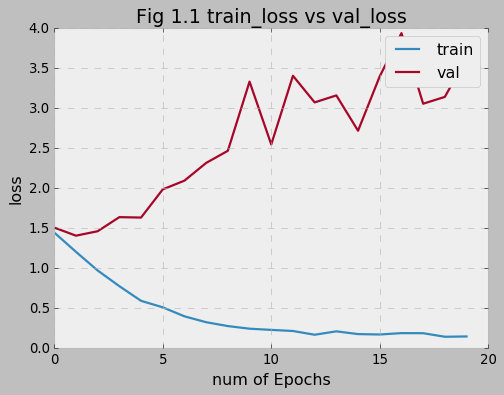

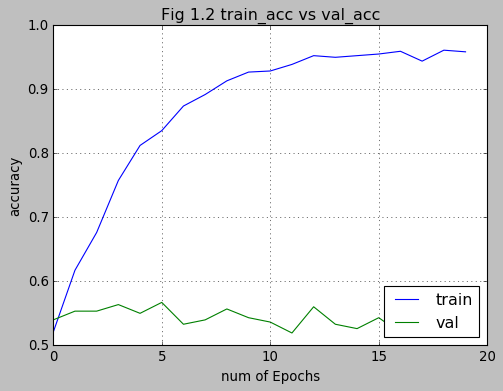

In [141]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 1.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 1.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [142]:
# Defining a new model with additional layers

model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

model.summary()

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  """
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_26 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_27 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
__________

In [144]:
# Training 2nd Model
hist2 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 130s 111ms/step - loss: 1.9880 - acc: 0.2712 - val_loss: 1.8543 - val_acc: 0.1980
Epoch 2/20
1169/1169 [==============================] - 121s 104ms/step - loss: 1.7911 - acc: 0.3610 - val_loss: 1.6831 - val_acc: 0.4266
Epoch 3/20
1169/1169 [==============================] - 132s 113ms/step - loss: 1.6946 - acc: 0.3978 - val_loss: 1.6194 - val_acc: 0.4676
Epoch 4/20
1169/1169 [==============================] - 132s 113ms/step - loss: 1.6180 - acc: 0.4448 - val_loss: 1.5710 - val_acc: 0.4881
Epoch 5/20
1169/1169 [==============================] - 115s 99ms/step - loss: 1.5671 - acc: 0.5030 - val_loss: 1.6001 - val_acc: 0.4471
Epoch 6/20
1169/1169 [==============================] - 116s 99ms/step - loss: 1.4419 - acc: 0.5175 - val_loss: 1.4932 - val_acc: 0.4915
Epoch 7/20
1169/1169 [==============================] - 115s 98ms/step - loss: 1.3977 - acc: 0.5483 - val_loss: 1.4132 - val_ac

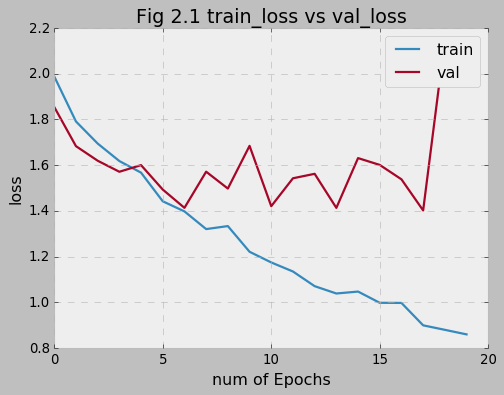

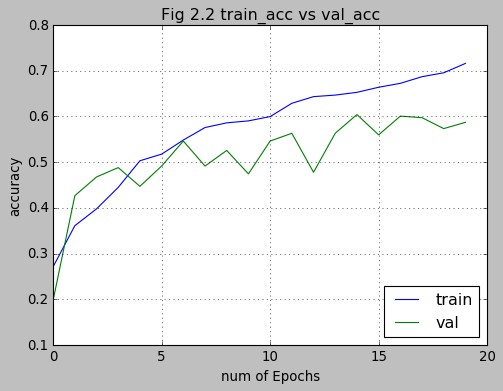

In [159]:
train_loss=hist2.history['loss']
val_loss=hist2.history['val_loss']
train_acc=hist2.history['acc']
val_acc=hist2.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 2.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 2.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [146]:
#Defining 3rd model with tanh activation function
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('tanh'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  after removing the cwd from sys.path.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_32 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_33 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 127008)            0         
__________

In [147]:
# Training 3rd Model
hist3 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 85s 73ms/step - loss: 2.5344 - acc: 0.2207 - val_loss: 1.8359 - val_acc: 0.3515
Epoch 2/20
1169/1169 [==============================] - 92s 78ms/step - loss: 2.3403 - acc: 0.2412 - val_loss: 1.8219 - val_acc: 0.3515
Epoch 3/20
1169/1169 [==============================] - 89s 76ms/step - loss: 2.2775 - acc: 0.2352 - val_loss: 1.8279 - val_acc: 0.3515
Epoch 4/20
1169/1169 [==============================] - 82s 70ms/step - loss: 2.2357 - acc: 0.2566 - val_loss: 1.8378 - val_acc: 0.3515
Epoch 5/20
1169/1169 [==============================] - 90s 77ms/step - loss: 2.2332 - acc: 0.2352 - val_loss: 1.8352 - val_acc: 0.3515
Epoch 6/20
1169/1169 [==============================] - 85s 73ms/step - loss: 2.1434 - acc: 0.2464 - val_loss: 1.8726 - val_acc: 0.3515
Epoch 7/20
1169/1169 [==============================] - 83s 71ms/step - loss: 2.1124 - acc: 0.2618 - val_loss: 1.8415 - val_acc: 0.3515
E

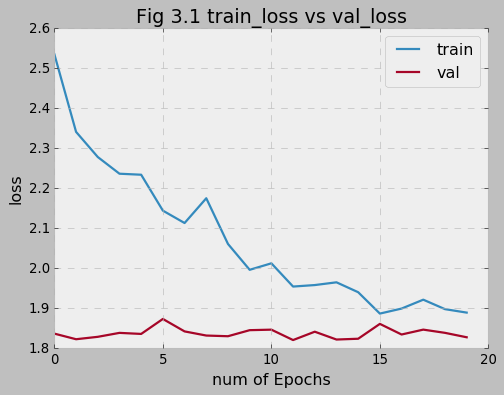

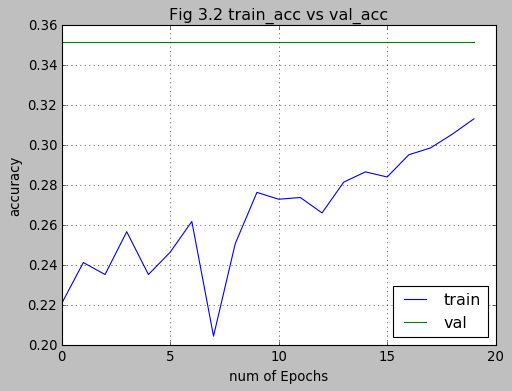

In [160]:
train_loss=hist3.history['loss']
val_loss=hist3.history['val_loss']
train_acc=hist3.history['acc']
val_acc=hist3.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 3.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 3.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [154]:
#Defining The 4th model with hinge costfunction 
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='hinge',
              metrics=['accuracy'])

model.summary()

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  after removing the cwd from sys.path.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_40 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_41 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 127008)            0         
__________

In [155]:
# Training 4th Model
hist4 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 77s 66ms/step - loss: 0.9683 - acc: 0.2849 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 2/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9646 - acc: 0.3208 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 3/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9646 - acc: 0.3199 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 4/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9649 - acc: 0.3165 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 5/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9653 - acc: 0.3148 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 6/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9668 - acc: 0.3097 - val_loss: 0.9609 - val_acc: 0.3515
Epoch 7/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.9649 - acc: 0.3191 - val_loss: 0.9609 - val_acc: 0.3515
E

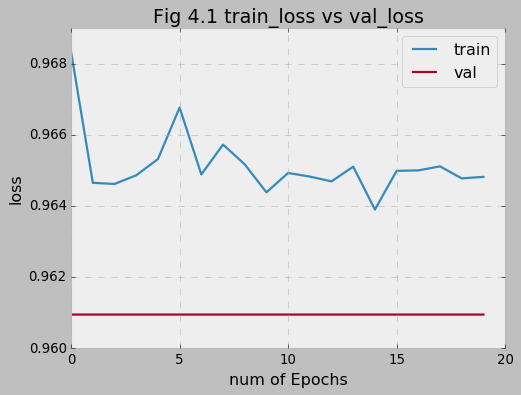

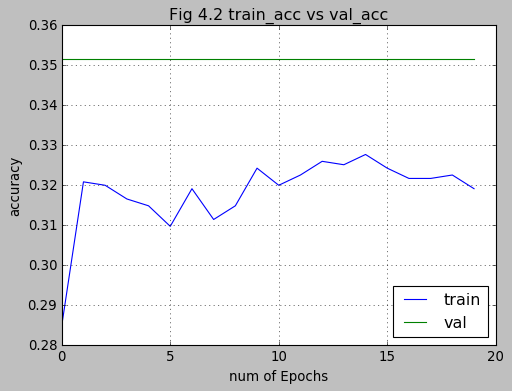

In [161]:
train_loss=hist4.history['loss']
val_loss=hist4.history['val_loss']
train_acc=hist4.history['acc']
val_acc=hist4.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 4.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 4.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [157]:
#Defining The 5th model with Stochastic Gradient Descent

model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

model.summary()

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_44 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_45 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 61, 61, 64)        18496     
__________

In [162]:
# Training 5th Model
hist5 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 121s 103ms/step - loss: 1.8296 - acc: 0.3285 - val_loss: 1.8326 - val_acc: 0.3515
Epoch 2/20
1169/1169 [==============================] - 124s 106ms/step - loss: 1.8349 - acc: 0.3268 - val_loss: 1.8153 - val_acc: 0.3515
Epoch 3/20
1169/1169 [==============================] - 113s 97ms/step - loss: 1.8110 - acc: 0.3293 - val_loss: 1.8133 - val_acc: 0.3515
Epoch 4/20
1169/1169 [==============================] - 126s 108ms/step - loss: 1.8135 - acc: 0.3293 - val_loss: 1.8116 - val_acc: 0.3515
Epoch 5/20
1169/1169 [==============================] - 116s 100ms/step - loss: 1.8122 - acc: 0.3293 - val_loss: 1.8126 - val_acc: 0.3515
Epoch 6/20
1169/1169 [==============================] - 112s 96ms/step - loss: 1.8177 - acc: 0.3293 - val_loss: 1.8062 - val_acc: 0.3515
Epoch 7/20
1169/1169 [==============================] - 113s 96ms/step - loss: 1.8083 - acc: 0.3293 - val_loss: 1.7905 - val_ac

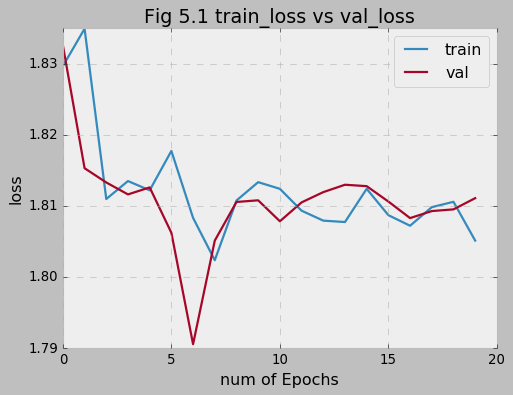

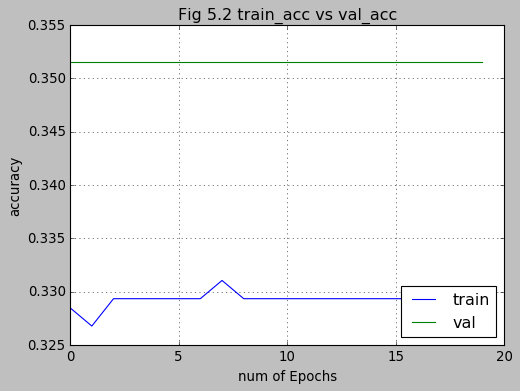

In [164]:
train_loss=hist5.history['loss']
val_loss=hist5.history['val_loss']
train_acc=hist5.history['acc']
val_acc=hist5.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 5.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 5.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [165]:
#Defining The 6th Model with zeroes initialier
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  after removing the cwd from sys.path.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_50 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_51 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 127008)            0         
__________

In [166]:
# Training 6th Model
hist6 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 90s 77ms/step - loss: 2.0027 - acc: 0.2934 - val_loss: 1.7985 - val_acc: 0.3857
Epoch 2/20
1169/1169 [==============================] - 79s 67ms/step - loss: 1.7162 - acc: 0.4012 - val_loss: 1.7009 - val_acc: 0.3891
Epoch 3/20
1169/1169 [==============================] - 85s 72ms/step - loss: 1.5208 - acc: 0.4919 - val_loss: 1.5898 - val_acc: 0.5256
Epoch 4/20
1169/1169 [==============================] - 79s 67ms/step - loss: 1.3548 - acc: 0.5586 - val_loss: 1.9589 - val_acc: 0.4676
Epoch 5/20
1169/1169 [==============================] - 79s 67ms/step - loss: 1.1999 - acc: 0.6065 - val_loss: 1.6163 - val_acc: 0.4983
Epoch 6/20
1169/1169 [==============================] - 79s 68ms/step - loss: 0.9597 - acc: 0.6741 - val_loss: 1.6067 - val_acc: 0.5392
Epoch 7/20
1169/1169 [==============================] - 80s 68ms/step - loss: 0.8292 - acc: 0.7211 - val_loss: 1.4997 - val_acc: 0.5461
E

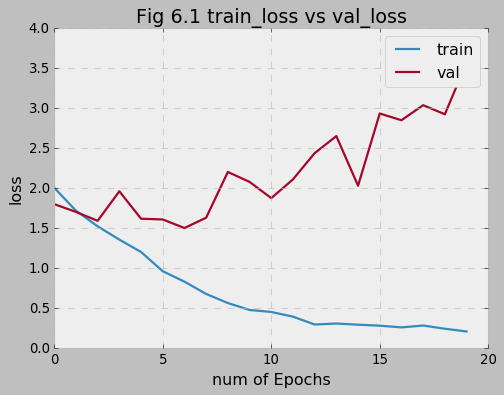

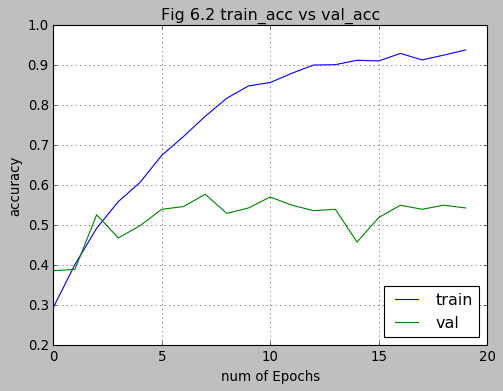

In [167]:
train_loss=hist6.history['loss']
val_loss=hist6.history['val_loss']
train_acc=hist6.history['acc']
val_acc=hist6.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 6.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 6.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

In [168]:
#Defining The 7th Model with ones initializer
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, bias_initializer='ones'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  after removing the cwd from sys.path.
D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_54 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_55 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 127008)            0         
__________

In [170]:
# Training 7th Model
hist7 = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

D:\Prgrams\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1169 samples, validate on 293 samples
Epoch 1/20
1169/1169 [==============================] - 79s 68ms/step - loss: 0.7992 - acc: 0.7374 - val_loss: 1.6578 - val_acc: 0.5529
Epoch 2/20
1169/1169 [==============================] - 78s 67ms/step - loss: 0.6725 - acc: 0.7776 - val_loss: 1.8540 - val_acc: 0.5631
Epoch 3/20
1169/1169 [==============================] - 78s 67ms/step - loss: 0.5681 - acc: 0.8050 - val_loss: 2.5040 - val_acc: 0.5392
Epoch 4/20
1169/1169 [==============================] - 77s 66ms/step - loss: 0.4728 - acc: 0.8443 - val_loss: 2.1185 - val_acc: 0.5324
Epoch 5/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.3826 - acc: 0.8751 - val_loss: 2.2591 - val_acc: 0.5495
Epoch 6/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.3578 - acc: 0.8871 - val_loss: 2.3900 - val_acc: 0.5188
Epoch 7/20
1169/1169 [==============================] - 75s 64ms/step - loss: 0.3494 - acc: 0.8811 - val_loss: 2.0147 - val_acc: 0.5324
E

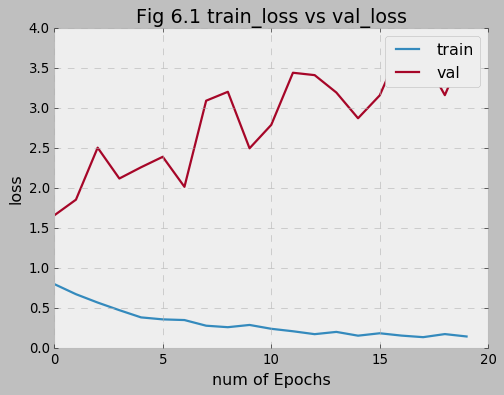

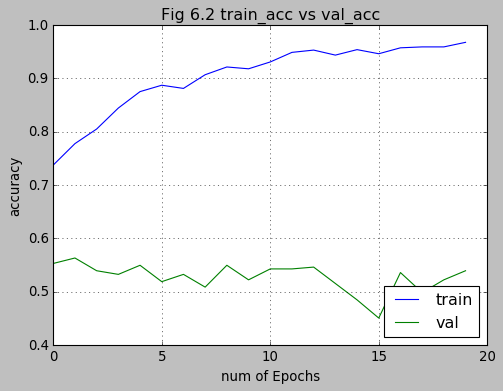

In [171]:
train_loss=hist7.history['loss']
val_loss=hist7.history['val_loss']
train_acc=hist7.history['acc']
val_acc=hist7.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Fig 6.1 train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Fig 6.2 train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['bmh'])

## Conclusion

### Part B
Activation Functions Used
* ReLU
* TanH

##### Q. How Does it effect the accuracy?

A. The ReLU Model Achieved Accuracy of 95.81% on training data and  54.27% on validation data at 20 Epochs which is a lot more than TanH Models accuracy(31.31% and 35.15%).


##### Q. How does it effect how quickly the network plateaus?

A. The ReLU model plateaus after the 9th Epoch with only 5% increase in accuracy over the next 11 Epochs. Whereas the TanH model plateaus at the 7th Epoch slightly drops and remains almost the same after that.

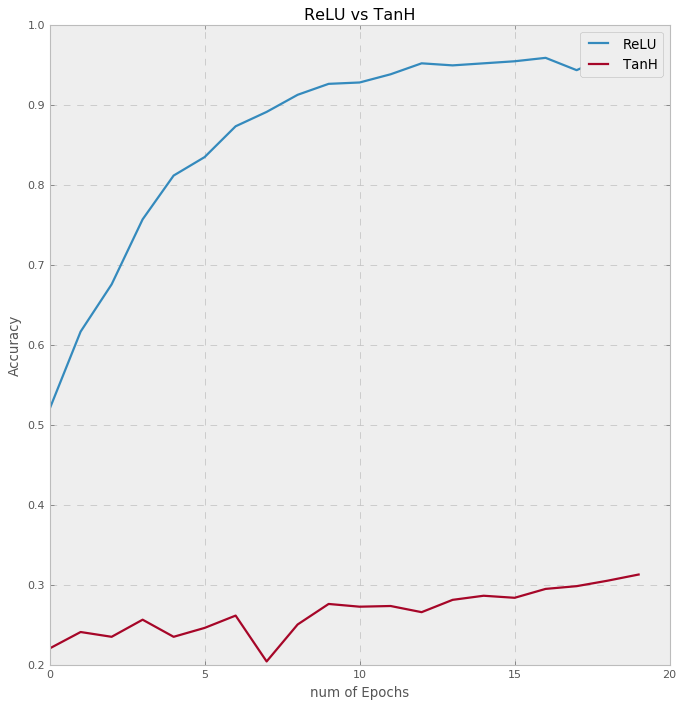

In [181]:
relu_acc=hist.history['acc']
tanh_acc=hist3.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,relu_acc)
plt.plot(xc,tanh_acc)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('ReLU vs TanH')
plt.grid(True)
plt.legend(['ReLU','TanH'])
plt.style.use(['bmh'])

### Part C
Cost Functions Used
* Categorical Crossentropy
* Hinge

##### Q. How Does it effect the accuracy?

A. The Crossentropy Model Achieved Accuracy of 95.81% on training data and  54.27% on validation data at 20 Epochs which is a lot more than Hinge Models accuracy(32.25% and 35.15%).


##### Q. How does it effect how quickly the network plateaus?

A. The Crossentropy model plateaus after the 9th Epoch with only 5% increase in accuracy over the next 11 Epochs. Whereas the Hinge model plateaus at the 2th Epoch and remains almost the same after that.

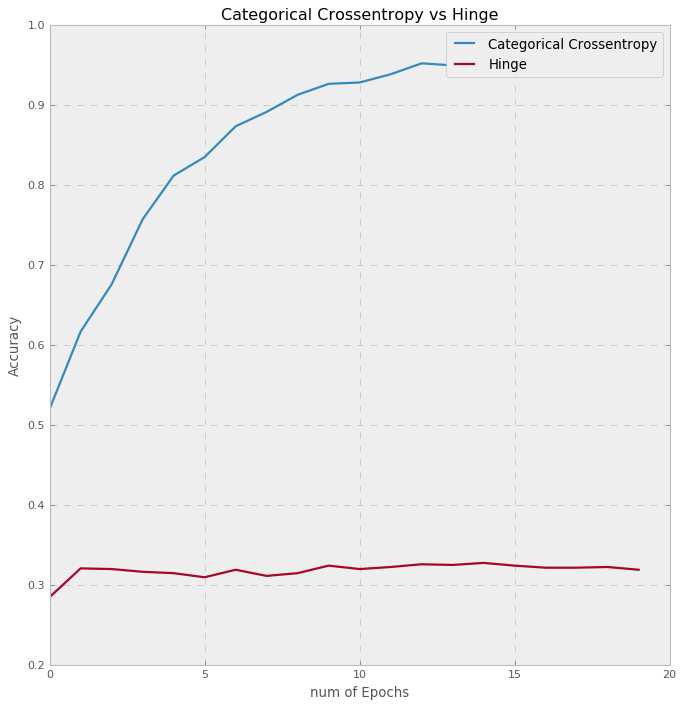

In [180]:
cat_acc=hist.history['acc']
hinge_acc=hist4.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,cat_acc)
plt.plot(xc,hinge_acc)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('Categorical Crossentropy vs Hinge')
plt.grid(True)
plt.legend(['Categorical Crossentropy','Hinge'])
plt.style.use(['bmh'])

### Part D
Max no of Epochs = 20 

##### Q. Change the number of epochs initialization. How does it effect the accuracy?

A. As the no of Epochs increases the accuracy of the model tends to increase however the accuracy usually plateaus after some no of Epochs. 


##### Q. How does it effect how quickly the network plateaus?

A. The Best model which we have  plateaus after the 9th Epoch with only 5% increase in accuracy over the next 11 Epochs. Wheras some models plateau after the 1st Epoch only.

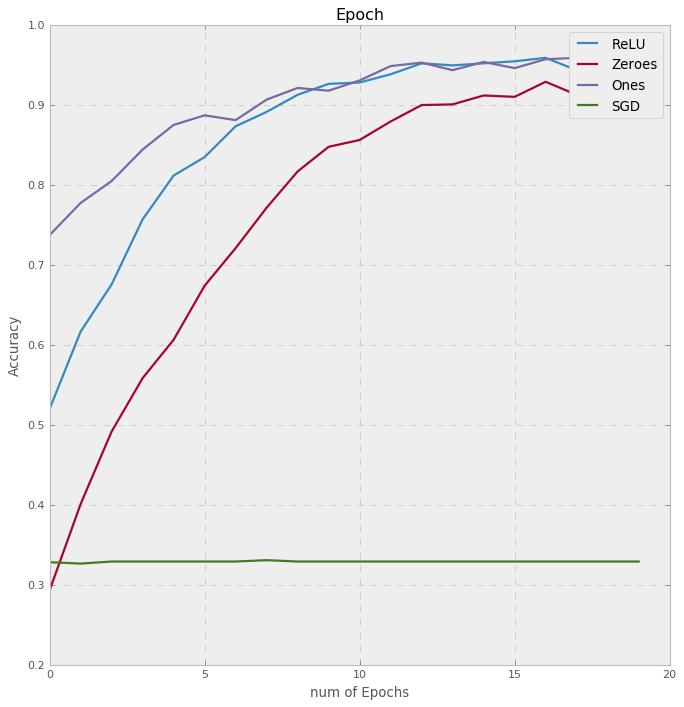

In [182]:
acc1=hist.history['acc']
acc2=hist6.history['acc']
acc3=hist7.history['acc']
acc4=hist5.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,acc1)
plt.plot(xc,acc2)
plt.plot(xc,acc3)
plt.plot(xc,acc4)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch')
plt.grid(True)
plt.legend(['ReLU','Zeroes','Ones','SGD'])
plt.style.use(['bmh'])

### Part E
Gradient estimations Used
* RMSProp
* Stochastic Gradient Descent

##### Q. How Does it effect the accuracy?

A. The RMSProp Model Achieved Accuracy of 95.81% on training data and  54.27% on validation data at 20 Epochs which is a lot more than Stochastic Gradient Descent Models accuracy(32.93% and 35.15%).


##### Q. How does it effect how quickly the network plateaus?

A. The RMSProp model plateaus after the 9th Epoch with only 5% increase in accuracy over the next 11 Epochs. Whereas the Stochastic Gradient Descent model plateaus at the 1st Epoch only and remains almost the same after that.

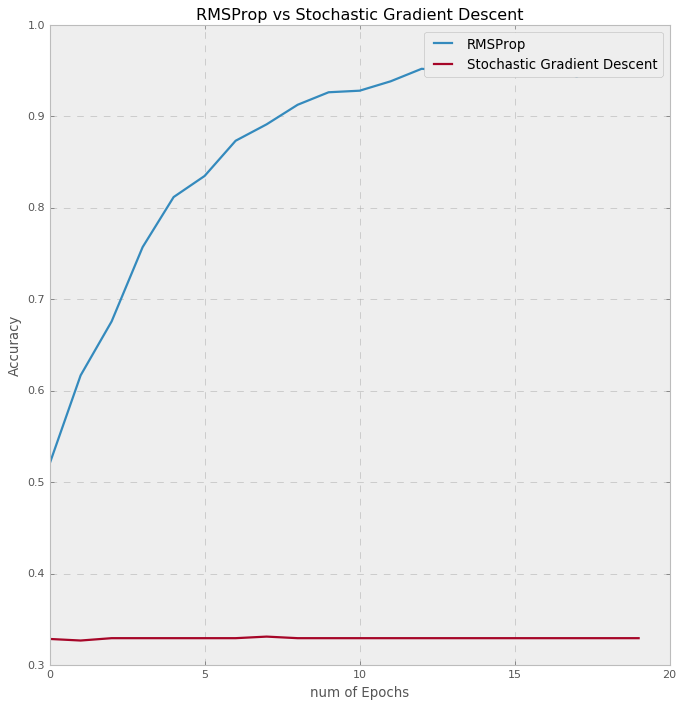

In [183]:
acc1=hist.history['acc']
acc4=hist5.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,acc1)
plt.plot(xc,acc4)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('RMSProp vs Stochastic Gradient Descent')
plt.grid(True)
plt.legend(['RMSProp','Stochastic Gradient Descent'])
plt.style.use(['bmh'])

### Part F
Network Architecture Used
Increased the no of layers on the base model

##### Q. How Does it effect the accuracy?

A. The Base Model Achieved Accuracy of 95.81% on training data at 20 Epochs which is a lot more than Model with more layers (accuracy 71.6%). However, thr model with more layers got slightly higher validation accuracy than the base model (58.7% and 54.27 respectively).


##### Q. How does it effect how quickly the network plateaus?

A. The Base model plateaus after the 9th Epoch with only 5% increase in accuracy over the next 11 Epochs. Whereas the model with additional layers plateaus at the 5th Epoch and only increases aout 1-2% after the 5th Epoch for each Epoch.

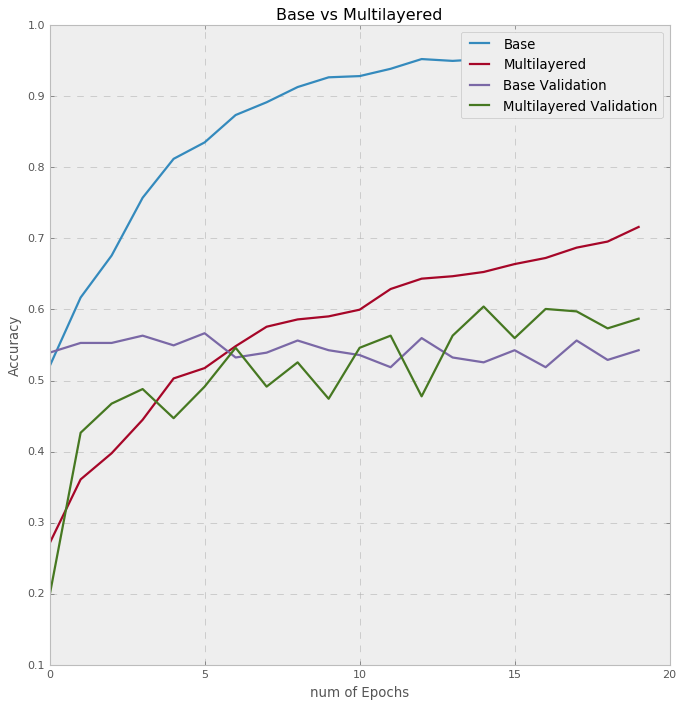

In [185]:
acc1=hist.history['acc']
acc4=hist2.history['acc']
acc3=hist.history['val_acc']
acc2=hist2.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,acc1)
plt.plot(xc,acc4)
plt.plot(xc,acc3)
plt.plot(xc,acc2)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('Base vs Multilayered')
plt.grid(True)
plt.legend(['Base','Multilayered','Base Validation', 'Multilayered Validation'])
plt.style.use(['bmh'])

### Part G
Network initialization Used
* Zeroes
* Ones

##### Q. How Does it effect the accuracy?

A. The Zeroes Model Achieved Accuracy of 93.76% on training data and  54.27% on validation data at 20 Epochs which is slightly less than ones Models accuracy(96.75% and 54.27%).


##### Q. How does it effect how quickly the network plateaus?

A. The Zeroes model plateaus after the 13th Epoch with only 4% increase in accuracy over the next 7 Epochs. Whereas the ones model plateaus at the 11th Epoch and remains almost the same after that.

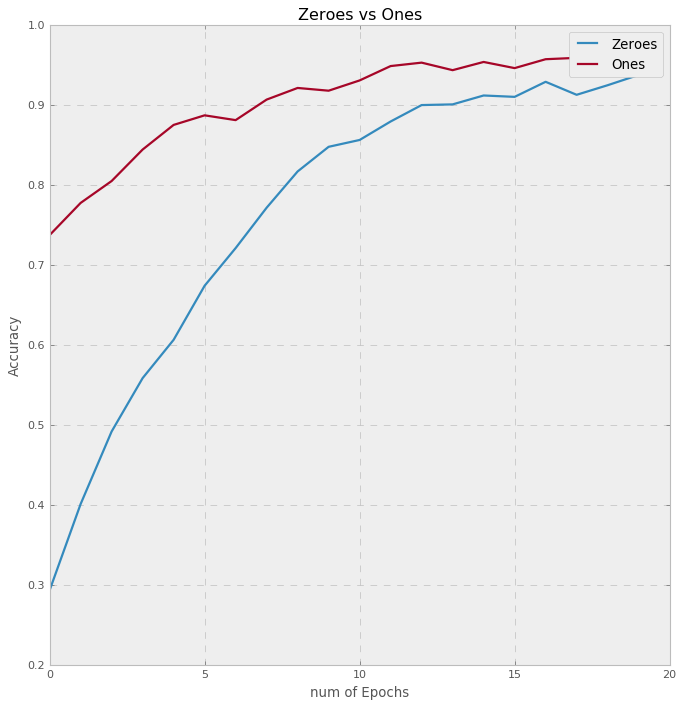

In [186]:
acc1=hist6.history['acc']
acc4=hist7.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(10,10))
plt.plot(xc,acc1)
plt.plot(xc,acc4)
plt.xlabel('num of Epochs')
plt.ylabel('Accuracy')
plt.title('Zeroes vs Ones')
plt.grid(True)
plt.legend(['Zeroes','Ones'])
plt.style.use(['bmh'])

## Citations
* https://clorichel.com/blog/2018/11/10/machine-learning-and-object-detection/
* https://medium.com/@bignikhilreddy/how-to-build-an-insanely-good-image-classifier-in-under-10-minutes-ea3edf411bc8
* https://medium.freecodecamp.org/deep-learning-image-classifier-for-game-of-thrones-dragons-42cd59a1972d
* https://github.com/aymericdamien/TensorFlow-Examples
* https://github.com/nikbearbrown/CSYE_7245/blob/master/Deep_Learning/%20TensorFlow_Tutorial_Simple_Linear_Model.ipynb
* https://medium.com/intro-to-artificial-intelligence/simple-image-classification-using-deep-learning-deep-learning-series-2-5e5b89e97926
* https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/index.html#3
* https://keras.io/getting-started/sequential-model-guide/
* https://www.youtube.com/watch?v=NUuMg5m42-g&list=PLd9i_xMMzZF4fgKwm_OhCspy0DhvPbiHf&index=5
* https://github.com/anujshah1003/own_data_cnn_implementation_keras/blob/master/updated_custom_data_cnn.py
* http://learnandshare645.blogspot.com/2016/06/feeding-your-own-data-set-into-cnn.html
* https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
* https://www.tensorflow.org/
* https://github.com/MuhammedBuyukkinaci/TensorFlow-Multiclass-Image-Classification-using-CNN-s
* https://www.youtube.com/watch?v=gT4F3HGYXf4
* https://www.youtube.com/watch?v=Ge65ukmJTzQ
* https://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/

## License
Copyright Ritvik Chauhan 2019

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

MIT License https://opensource.org/licenses/MIT